In [0]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.linalg import inv,pinv
from numpy.linalg import det
from numpy.linalg import norm
% matplotlib inline

In [0]:
def viz_data_points(o1,o2):
  o1=o1.T
  o2=o2.T
  plt.figure(figsize=(10,10))
  plt.scatter(o1[0],o1[1],label='label_1')
  plt.scatter(o2[0],o2[1],label='label_2')
  plt.title('Visualization of multivariate data points')
  
  plt.legend()
  plt.xlabel('X-axis')
  plt.ylabel('Y-axis')

In [0]:
def Decision_Boundary(w1_1,w1_2,w2_1,w2_2,x,y):
  plt.figure(figsize=(10,10))
  plt.scatter(w2_2.iloc[:,0],w2_2.iloc[:,1],label='class 2 predicted as class 2')
  plt.scatter(w2_1.iloc[:,0],w2_1.iloc[:,1],label='class 2 predicted as class 1')
  plt.scatter(w1_1.iloc[:,0],w1_1.iloc[:,1],label='class 1 predicted as class 1')
  plt.scatter(w1_2.iloc[:,0],w1_2.iloc[:,1],label='class 1 predicted as class 2')
  plt.plot(x,y)
 
  plt.title('Class predictions with decision Boundary')
  plt.legend()
  plt.xlabel('X-axis')
  plt.ylabel('Y-axis')

In [0]:
def Single_class_boundary(w2_2,w2_1,x,y,c1,c2):
  plt.figure(figsize=(10,10))
  plt.scatter(w2_2.iloc[:,0],w2_2.iloc[:,1],label='class {} predicted as class {}'.format(c1,c1))
  plt.scatter(w2_1.iloc[:,0],w2_1.iloc[:,1],label='class {} predicted as class {}'.format(c1,c2))
  plt.plot(x,y)

  plt.title('Class {} predictions with decision Boundary'.format(c1))
  plt.legend()
  plt.xlabel('X-axis')
  plt.ylabel('Y-axis')

# Question 2.1

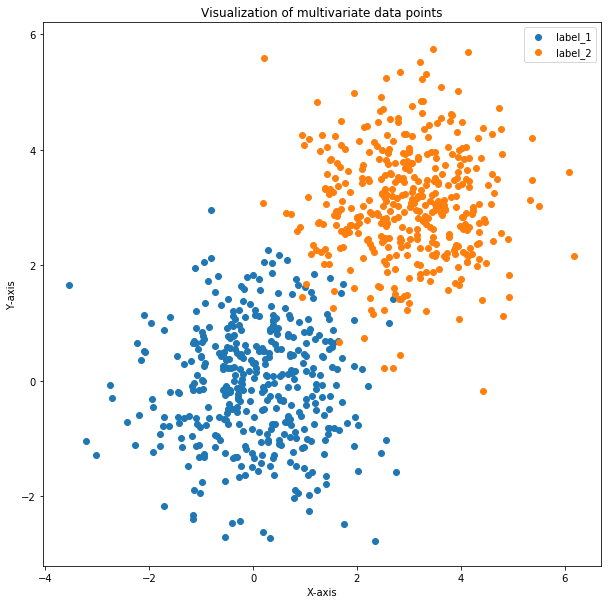

In [0]:
mean1=[0,0]
cov1=[[1,0],[0,1]]
mean2=[3,3]
cov2=[[1,0],[0,1]]
p_w1=0.5
p_w2=0.5
sigma=1
o1= np.random.multivariate_normal(mean1, cov1, 400) # creates the multivariate rv  with the given mean and cov

o2= np.random.multivariate_normal(mean2, cov2, 400)
viz_data_points(o1,o2)


In [0]:
mean1=np.array(mean1).reshape(2,1)
cov1=np.array(cov1)
mean2=np.array(mean2).reshape(2,1)
cov2=np.array(cov2)


In [0]:
x0=((mean2+mean1)/2) -  ((sigma**2)/((norm(mean1-mean2))**2))*(np.log(p_w1/p_w2))*(mean1-mean2) # gives us the decision boundary
w=mean1-mean2


In [0]:
x=np.linspace(-3,7,500)
y=x0[0]+x0[1]-x# equation for decision boundary

In [0]:
w1=pd.DataFrame(data=o1,columns=['d1','d2'])
w1['Real_Label']=np.ones(400)*1
a=[]
for i in range(len(w1)):
  if((w1.iloc[i,0]+w1.iloc[i,1]>3)):
    a.append(2)
  else :
    a.append(1)
w1['Predicted_label']=a
 
w2=pd.DataFrame(data=o2,columns=['d1','d2'])
w2['Real_Label']=np.ones(400)*2
a=[]
for i in range(len(w2)):
  if((w2.iloc[i,0]+w2.iloc[i,1]>3)):
    a.append(2)
  else :
     a.append(1)
w2['Predicted_label']=a
  


In [0]:
print('The number of labels in class 1 classified as label 1 are {} and as label 2 are {}'.format(len(w1[w1['Predicted_label']==1]),len(w1[w1['Predicted_label']==2]))) 
print('The number of labels in class 2 classified as label 2 are {} and as label 1 are {}'.format(len(w2[w2['Predicted_label']==2]),len(w2[w2['Predicted_label']==1]))) 
w1_1=w1[w1['Predicted_label']==1]
w1_2=w1[w1['Predicted_label']==2]
w2_1=w2[w2['Predicted_label']==1]
w2_2=w2[w2['Predicted_label']==2]

The number of labels in class 1 classified as label 1 are 394 and as label 2 are 6
The number of labels in class 2 classified as label 2 are 395 and as label 1 are 5


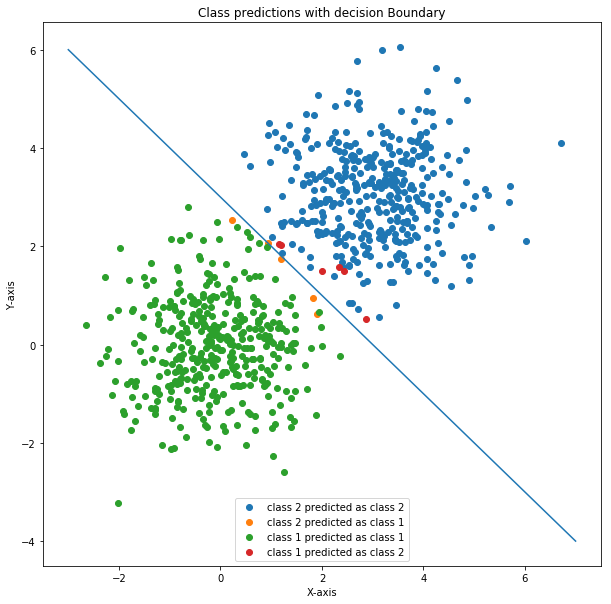

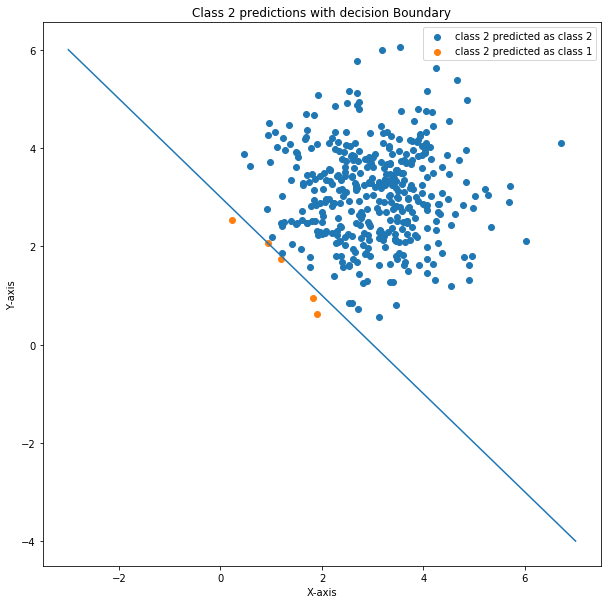

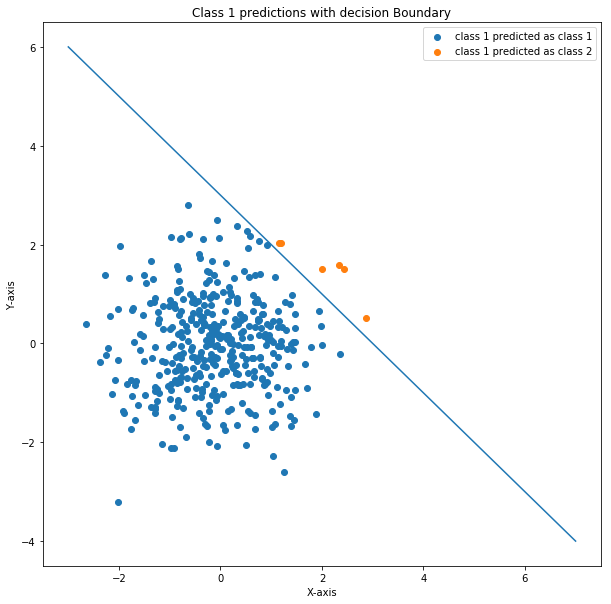

In [0]:
Decision_Boundary(w1_1,w1_2,w2_1,w2_2,x,y)
Single_class_boundary(w2_2,w2_1,x,y,2,1)
Single_class_boundary(w1_1,w1_2,x,y,1,2)

In [0]:
ch=(len(w1[w1['Predicted_label']==2])+len(w2[w2['Predicted_label']==1]))/800
print('Probability of error is {}'.format(ch))

Probability of error is 0.01375


# Using discriminant function

In [0]:
W1=mean1/(sigma**2)
W2=mean2/(sigma**2)
W10=((mean1.T@mean1)/(-2*(sigma**2)))+np.log(p_w1)
W20=((mean2.T@mean2)/(-2*(sigma**2)))+np.log(p_w2)

In [0]:
g1_1=(W1.T@o1.T)+W10
g1_2=(W2.T@o1.T)+W20
g2_1=(W1.T@o2.T)+W10
g2_2=(W2.T@o2.T)+W20

In [0]:
cof=(W20-W10)*pinv(W1.T-W2.T)
cof

array([[1.5],
       [1.5]])

In [0]:
(g1_1- g1_2).shape

(1, 400)

In [0]:
n1_1=w1[(g1_1>g1_2).reshape(-1,1)]
n1_2=w1[(g1_1<g1_2).reshape(-1,1)]
n2_2=w2[(g2_2>g2_1).reshape(-1,1)]
n2_1=w2[(g2_2<g2_1).reshape(-1,1)]

In [0]:
len(n2_1)

6

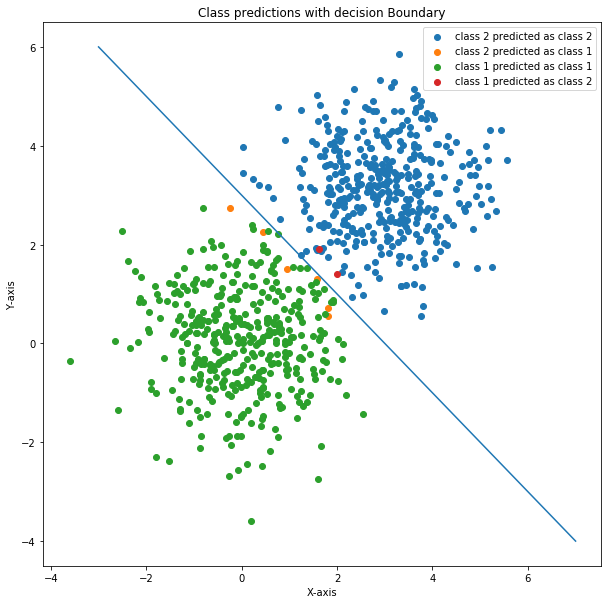

In [0]:
Decision_Boundary(n1_1,n1_2,n2_1,n2_2,x,y)

# Question 2.4 changing the priors alone , Distribution of data points stay the same, Likelihood stays the same

In [0]:
p_w1=0.05
p_w2=0.95

In [0]:
x0=((mean2+mean1)/2) -  ((sigma**2)/((norm(mean1-mean2))**2))*(np.log(p_w1/p_w2))*(mean1-mean2) # gives us the decision boundary


In [0]:
x=np.linspace(-3,7,500)
y=x0[0]+x0[1]-x# equation for decision boundary

In [0]:
w1=pd.DataFrame(data=o1,columns=['d1','d2'])
w1['Real_Label']=np.ones(400)*1
a=[]
for i in range(len(w1)):
  if((w1.iloc[i,0]+w1.iloc[i,1]>(x0[0]+x0[1]))):
    a.append(2)
  else :
    a.append(1)
w1['Predicted_label']=a
 
w2=pd.DataFrame(data=o2,columns=['d1','d2'])
w2['Real_Label']=np.ones(400)*2
a=[]
for i in range(len(w2)):
  if((w2.iloc[i,0]+w2.iloc[i,1]>(x0[0]+x0[1]))):
    a.append(2)
  else :
     a.append(1)
w2['Predicted_label']=a
  

In [0]:
print('The number of labels in class 1 classified as label 1 are {} and as label 2 are {}'.format(len(w1[w1['Predicted_label']==1]),len(w1[w1['Predicted_label']==2]))) 
print('The number of labels in class 2 classified as label 2 are {} and as label 1 are {}'.format(len(w2[w2['Predicted_label']==2]),len(w2[w2['Predicted_label']==1]))) 
w1_1=w1[w1['Predicted_label']==1]
w1_2=w1[w1['Predicted_label']==2]
w2_1=w2[w2['Predicted_label']==1]
w2_2=w2[w2['Predicted_label']==2]

The number of labels in class 1 classified as label 1 are 363 and as label 2 are 37
The number of labels in class 2 classified as label 2 are 400 and as label 1 are 0


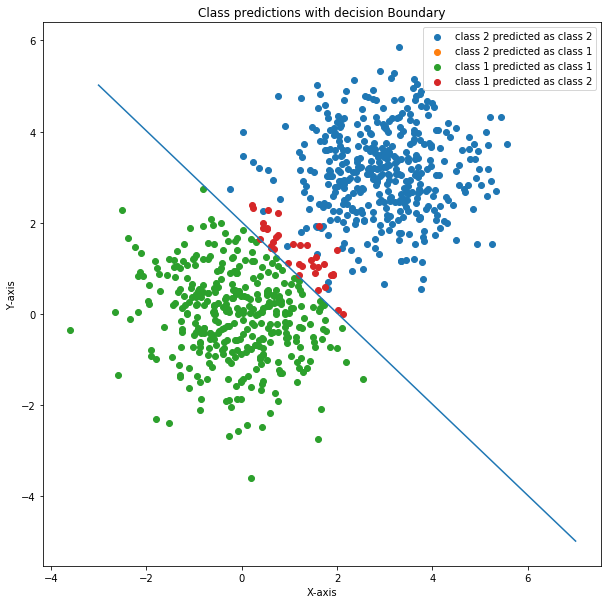

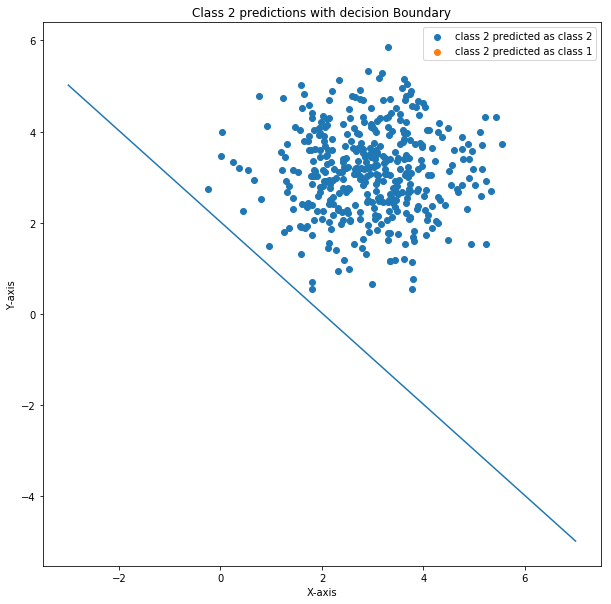

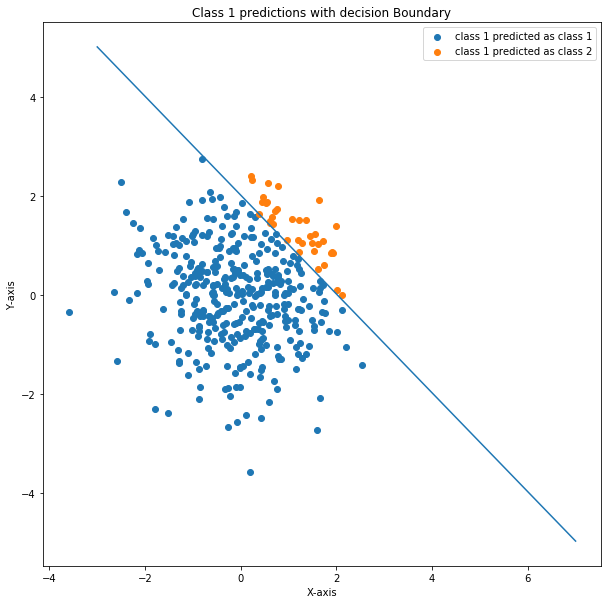

In [0]:
Decision_Boundary(w1_1,w1_2,w2_1,w2_2,x,y)
Single_class_boundary(w2_2,w2_1,x,y,2,1)
Single_class_boundary(w1_1,w1_2,x,y,1,2)

In [0]:
ch=(len(w1_2)+len(w2_1))/800
print('Probability of error is {}'.format(ch))

Probability of error is 0.045


# Visualizing the same points generated by random.multivariate using the transformation technique on zero mean identity covariance normal

Text(0, 0.5, 'Y-axis')

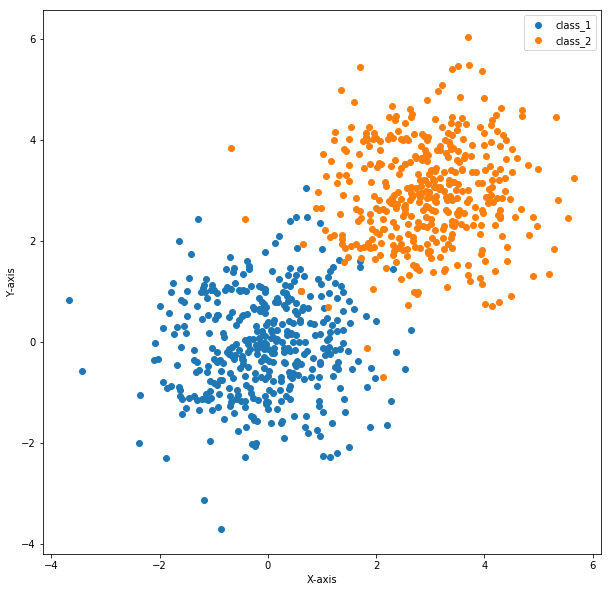

In [0]:
iidu1 = np.random.normal(loc=0, scale=1, size=2*400)
iidu1=iidu1.reshape(2,400)

mean1=np.zeros((2,400))
C1 = np.linalg.cholesky(cov1)
check1= np.dot(C1, iidu1)+ mean1


mean2=np.ones((2,400))*3
C2 = np.linalg.cholesky(cov2)
check2= np.dot(C2, iidu1)+ mean2

plt.figure(figsize=(10,10))
plt.scatter(check1[0],check1[1],label='class_1')
plt.scatter(check2[0],check2[1],label='class_2')
plt.legend()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Question 2.2

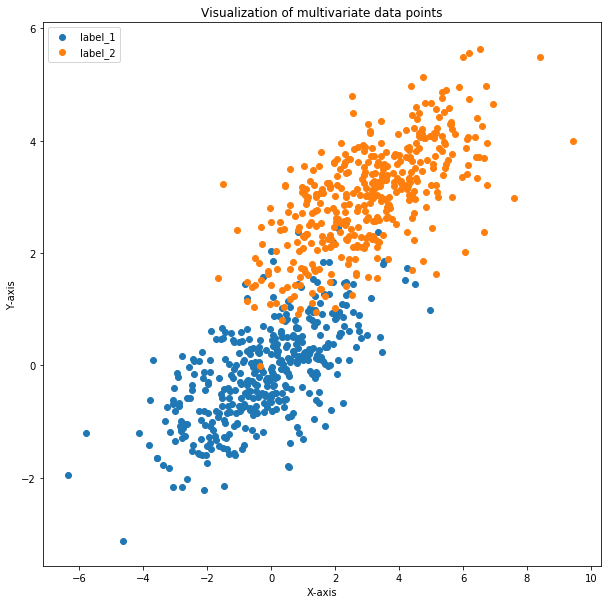

In [0]:
mean1=[0,0]
cov1=[[3,1],[1,0.8]]
mean2=[3,3]
cov2=[[3,1],[1,0.8]]
p_w1=0.5
p_w2=0.5
o1= np.random.multivariate_normal(mean1, cov1, 400) # creates the multivariate normal distro with the given mean and cov
o2= np.random.multivariate_normal(mean2, cov2, 400)
viz_data_points(o1,o2)


In [0]:
mean1=np.array(mean1).reshape(2,1)
cov1=np.array(cov1)
mean2=np.array(mean2).reshape(2,1)
cov2=np.array(cov2)

In [0]:
x0=((mean2+mean1)/2) -  ((np.log(p_w1/p_w2))*(mean1-mean2)/((mean1-mean2).T@inv(cov1)@(mean1-mean2))) # gives us the decision boundary
w=inv(cov1)@(mean1-mean2)

In [0]:
x=np.linspace(-3,7,500)
y=1.35 + (0.1*x)# equation for decision boundary

In [0]:
w1=pd.DataFrame(data=o1,columns=['d1','d2'])
w1['Real_Label']=np.ones(400)*1
a=[]
for i in range(len(w1)):
  if( ((10*w1.iloc[i,1])-(w1.iloc[i,0]))>13.5):
    a.append(2)
  else :
    a.append(1)
w1['Predicted_label']=a
 
w2=pd.DataFrame(data=o2,columns=['d1','d2'])
w2['Real_Label']=np.ones(400)*2
a=[]
for i in range(len(w2)):
  if( ((10*w2.iloc[i,1])-(w2.iloc[i,0]))>13.5):
    a.append(2)
  else :
     a.append(1)
w2['Predicted_label']=a
  

In [0]:
print('The number of labels in class 1 classified as label 1 are {} and as label 2 are {}'.format(len(w1[w1['Predicted_label']==1]),len(w1[w1['Predicted_label']==2]))) 
print('The number of labels in class 2 classified as label 2 are {} and as label 1 are {}'.format(len(w2[w2['Predicted_label']==2]),len(w2[w2['Predicted_label']==1]))) 
w1_1=w1[w1['Predicted_label']==1]
w1_2=w1[w1['Predicted_label']==2]
w2_1=w2[w2['Predicted_label']==1]
w2_2=w2[w2['Predicted_label']==2]

The number of labels in class 1 classified as label 1 are 386 and as label 2 are 14
The number of labels in class 2 classified as label 2 are 371 and as label 1 are 29


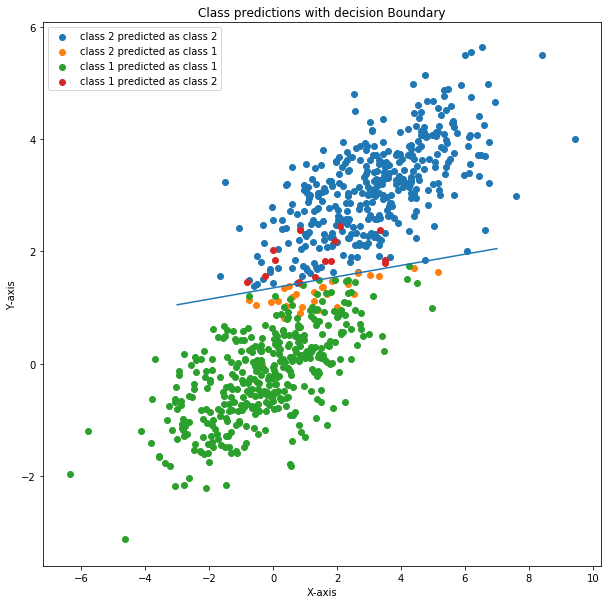

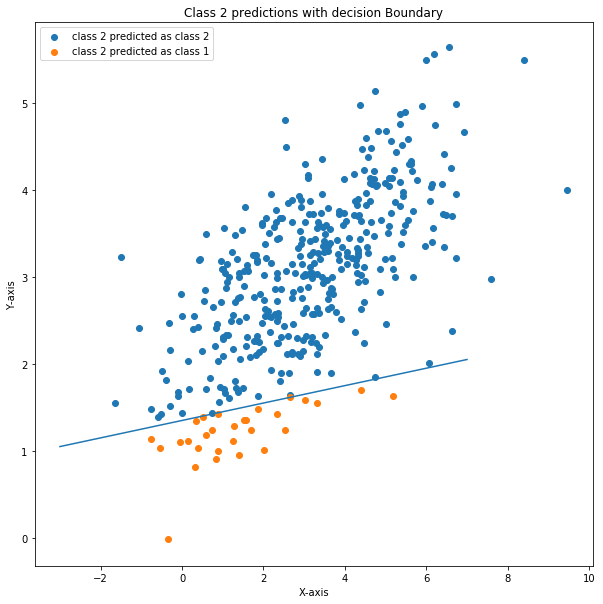

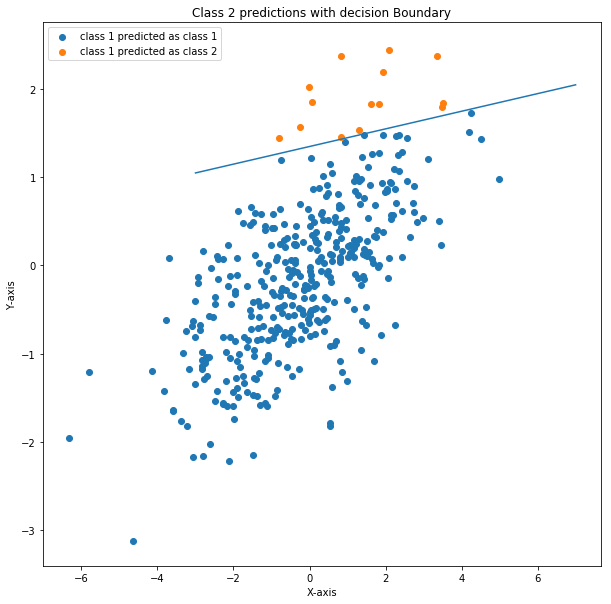

In [0]:
Decision_Boundary(w1_1,w1_2,w2_1,w2_2,x,y)
Single_class_boundary(w2_2,w2_1,x,y,2,1)
Single_class_boundary(w1_1,w1_2,x,y,1,2)

In [0]:
ch=(len(w1_2)+len(w2_1))/800
print('Probability of error is {}'.format(ch))

Probability of error is 0.05375


# Question 2.5, with a change in prioirs only

In [0]:
p_w1=0.05
p_w2=0.95

In [0]:
x0=((mean2+mean1)/2) -  ((np.log(p_w1/p_w2))*(mean1-mean2)/((mean1-mean2).T@inv(cov1)@(mean1-mean2))) # gives us the decision boundary
x0

array([[0.73662693],
       [0.73662693]])

In [0]:
x=np.linspace(-3,7,500)
y=(0.1*x)+0.66# equation for decision boundary

In [0]:
w1=pd.DataFrame(data=o1,columns=['d1','d2'])
w1['Real_Label']=np.ones(400)*1
a=[]
for i in range(len(w1)):
  if( ((w1.iloc[i,1])-(0.1*w1.iloc[i,0]) ) >0.66):
    a.append(2)
  else :
    a.append(1)
w1['Predicted_label']=a
 
w2=pd.DataFrame(data=o2,columns=['d1','d2'])
w2['Real_Label']=np.ones(400)*2
a=[]
for i in range(len(w2)):
  if( ((w2.iloc[i,1])-(0.1*w2.iloc[i,0]) ) >0.66):
    a.append(2)
  else :
    a.append(1)
w2['Predicted_label']=a
  

In [0]:
print('The number of labels in class 1 classified as label 1 are {} and as label 2 are {}'.format(len(w1[w1['Predicted_label']==1]),len(w1[w1['Predicted_label']==2]))) 
print('The number of labels in class 2 classified as label 2 are {} and as label 1 are {}'.format(len(w2[w2['Predicted_label']==2]),len(w2[w2['Predicted_label']==1]))) 
w1_1=w1[w1['Predicted_label']==1]
w1_2=w1[w1['Predicted_label']==2]
w2_1=w2[w2['Predicted_label']==1]
w2_2=w2[w2['Predicted_label']==2]

The number of labels in class 1 classified as label 1 are 338 and as label 2 are 62
The number of labels in class 2 classified as label 2 are 399 and as label 1 are 1


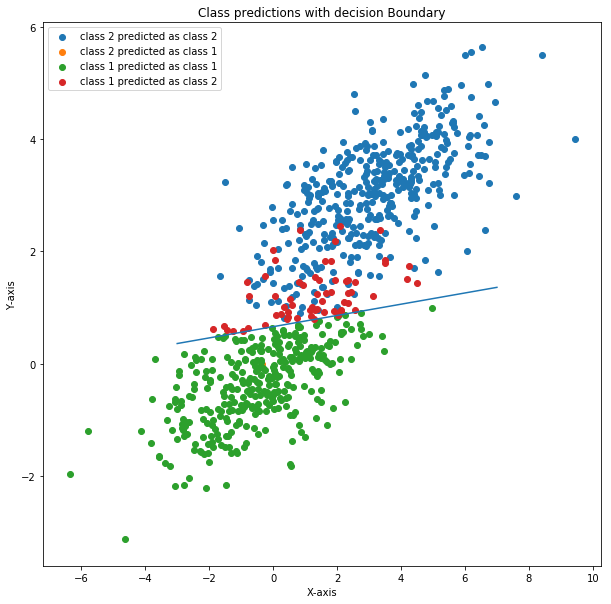

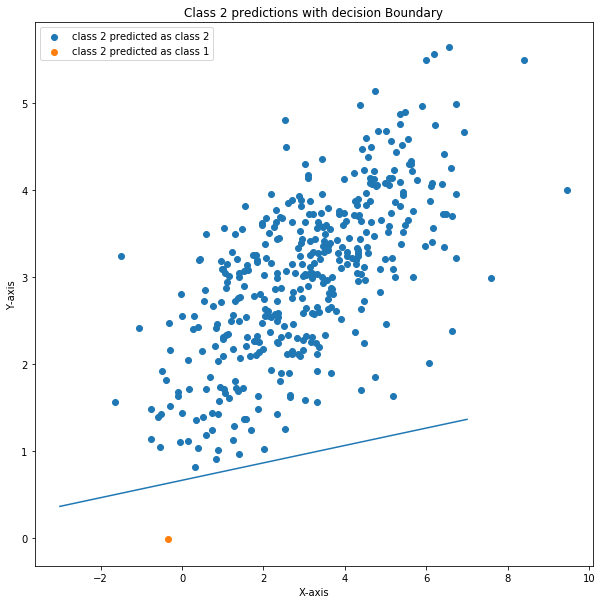

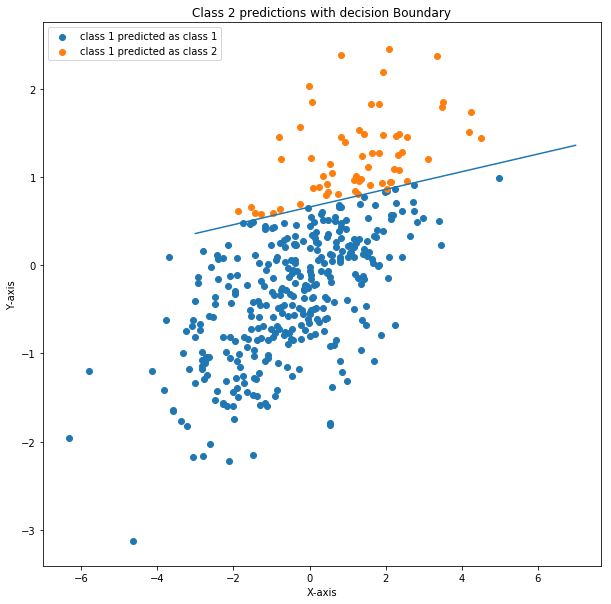

In [0]:
Decision_Boundary(w1_1,w1_2,w2_1,w2_2,x,y)
Single_class_boundary(w2_2,w2_1,x,y,2,1)
Single_class_boundary(w1_1,w1_2,x,y,1,2)

In [0]:
ch=(len(w1_2)+len(w2_1))/800
print('Probability of error is {}'.format(ch))

Probability of error is 0.07875


# Question 2.3

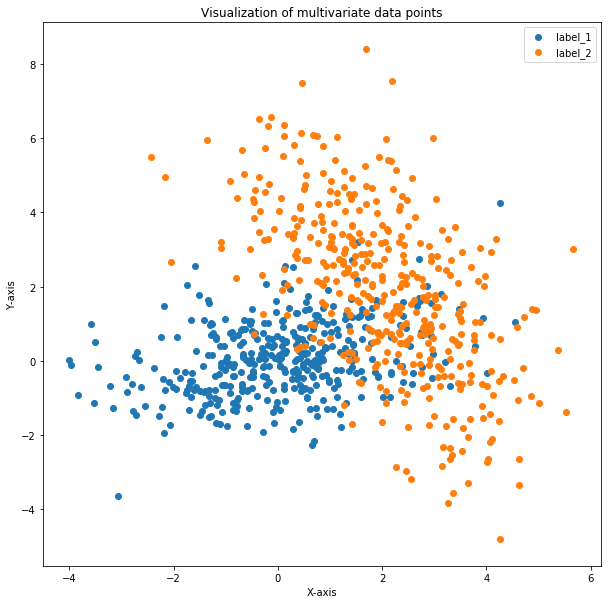

In [0]:
mean1=[0,0]
cov1=[[2,0.5],[0.5,1]]
mean2=[2,2]
cov2=[[2,-1.9],[-1.9,5]]
p_w1=0.5
p_w2=0.5
o1= np.random.multivariate_normal(mean1, cov1, 400) # creates the multivariate normal distro with the given mean and cov
o2= np.random.multivariate_normal(mean2, cov2, 400)
viz_data_points(o1,o2)


In [0]:
mean1=np.array(mean1).reshape(2,1)
cov1=np.array(cov1)
mean2=np.array(mean2).reshape(2,1)
cov2=np.array(cov2)

In [0]:
#x0=((mean2+mean1)/2) -  ((np.log(p_w1/p_w2))*(mean1-mean2)/((mean1-mean2).T@inv(cov1)@(mean1-mean2))) # gives us the decision boundary

In [0]:
W1=(-0.5)*inv(cov1)
W2=(-0.5)*inv(cov2)
w1=inv(cov1)@mean1
w2=inv(cov2)@mean2
w10=-(mean1.T@inv(cov1)@mean1/2)- np.log(det(cov1))/2 + np.log(p_w1)
w20=-(mean2.T@inv(cov2)@mean2/2)- np.log(det(cov2))/2 + np.log(p_w2)
g1_1=np.diag(o1@W1@o1.T) + (w1.T@o1.T) + w10
g1_2=np.diag(o1@W2@o1.T) + (w2.T@o1.T) + w20
g2_1=np.diag(o2@W1@o2.T) + (w1.T@o2.T) + w10
g2_2=np.diag(o2@W2@o2.T) + (w2.T@o2.T) + w20
w1=pd.DataFrame(data=o1,columns=['d1','d2'])
w1['Real_Label']=np.ones(400)*1
w2=pd.DataFrame(data=o2,columns=['d1','d2'])
w2['Real_Label']=np.ones(400)*2
n1_1=w1[(g1_1>g1_2).reshape(-1,1)]
n1_2=w1[(g1_1<g1_2).reshape(-1,1)]
n2_2=w2[(g2_2>g2_1).reshape(-1,1)]
n2_1=w2[(g2_2<g2_1).reshape(-1,1)]


In [0]:
W1

array([[-0.28571429,  0.14285714],
       [ 0.14285714, -0.57142857]])

In [0]:
w1

,d1,d2,Real_Label
0,0.654238,-0.397301,1.0
1,1.462251,0.198303,1.0
2,-0.545371,0.998891,1.0
3,1.074130,-0.722810,1.0
4,0.768579,1.198095,1.0
5,-1.126208,-0.353976,1.0
6,-0.026645,-1.121360,1.0
7,-1.675566,-0.965919,1.0
8,1.372486,0.944672,1.0
9,4.013771,-0.339160,1.0


Text(0, 0.5, 'Y-axis')

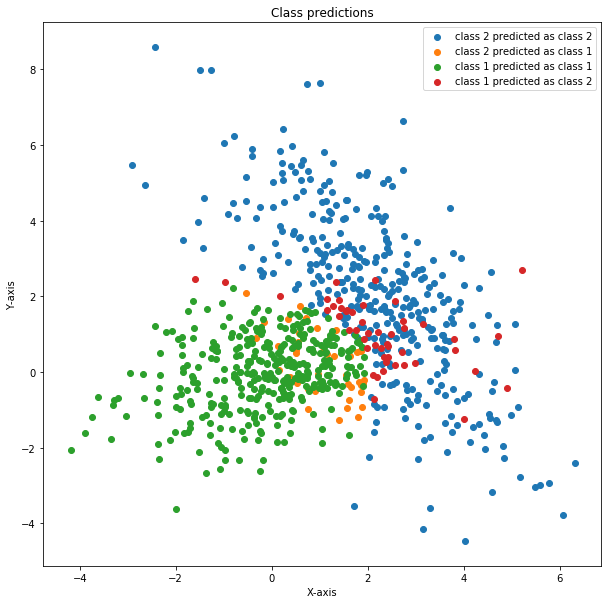

In [0]:
plt.figure(figsize=(10,10))
plt.scatter(n2_2.iloc[:,0],n2_2.iloc[:,1],label='class 2 predicted as class 2')
plt.scatter(n2_1.iloc[:,0],n2_1.iloc[:,1],label='class 2 predicted as class 1')
plt.scatter(n1_1.iloc[:,0],n1_1.iloc[:,1],label='class 1 predicted as class 1')
plt.scatter(n1_2.iloc[:,0],n1_2.iloc[:,1],label='class 1 predicted as class 2')


plt.title('Class predictions')
plt.legend()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

Text(0, 0.5, 'Y-axis')

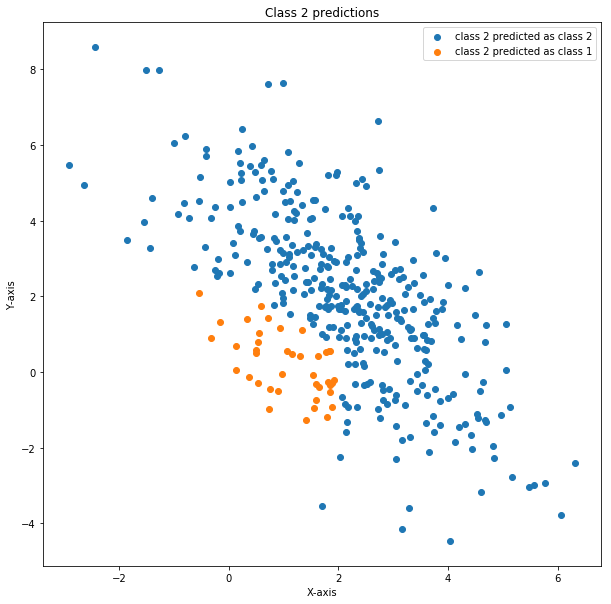

In [0]:
plt.figure(figsize=(10,10))
plt.scatter(n2_2.iloc[:,0],n2_2.iloc[:,1],label='class 2 predicted as class 2')
plt.scatter(n2_1.iloc[:,0],n2_1.iloc[:,1],label='class 2 predicted as class 1')
#plt.scatter(n1_1.iloc[:,0],n1_1.iloc[:,1],label='class 1 predicted as class 1')
#plt.scatter(n1_2.iloc[:,0],n1_2.iloc[:,1],label='class 1 predicted as class 2')


plt.title('Class 2 predictions')
plt.legend()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

Text(0, 0.5, 'Y-axis')

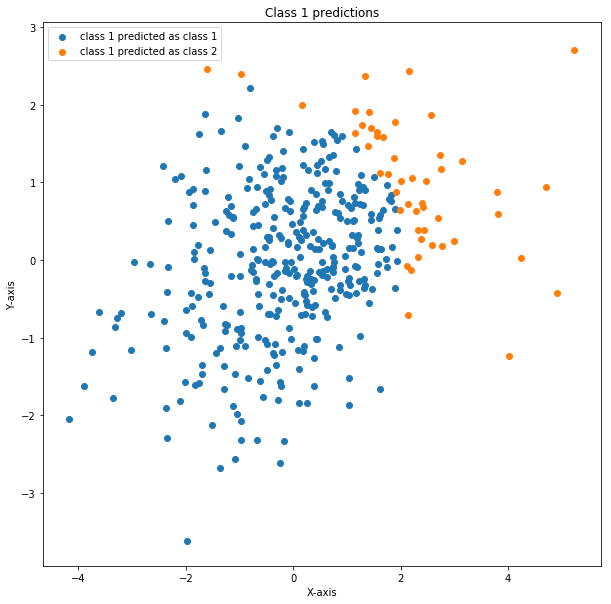

In [0]:
plt.figure(figsize=(10,10))
#plt.scatter(n2_2.iloc[:,0],n2_2.iloc[:,1],label='class 2 predicted as class 2')
#plt.scatter(n2_1.iloc[:,0],n2_1.iloc[:,1],label='class 2 predicted as class 1')
plt.scatter(n1_1.iloc[:,0],n1_1.iloc[:,1],label='class 1 predicted as class 1')
plt.scatter(n1_2.iloc[:,0],n1_2.iloc[:,1],label='class 1 predicted as class 2')


plt.title('Class 1 predictions')
plt.legend()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

In [0]:
ch=(len(n1_2)+len(n2_1))/800
print('Probability of error is {}'.format(ch))

Probability of error is 0.11125


# Question 2.6 changing Prioirs 

In [0]:
p_w1=0.05
p_w2=0.95


In [0]:
W1=(-0.5)*inv(cov1)
W2=(-0.5)*inv(cov2)
w1=inv(cov1)@mean1
w2=inv(cov2)@mean2

In [0]:
w10=-(mean1.T@inv(cov1)@mean1/2)- np.log(det(cov1))/2 + np.log(p_w1)
w20=-(mean2.T@inv(cov2)@mean2/2)- np.log(det(cov2))/2 + np.log(p_w2)

In [0]:
g1_1=np.diag(o1@W1@o1.T) + (w1.T@o1.T) + w10
g1_2=np.diag(o1@W2@o1.T) + (w2.T@o1.T) + w20
g2_1=np.diag(o2@W1@o2.T) + (w1.T@o2.T) + w10
g2_2=np.diag(o2@W2@o2.T) + (w2.T@o2.T) + w20

In [0]:
w1=pd.DataFrame(data=o1,columns=['d1','d2'])
w1['Real_Label']=np.ones(400)*1

 
w2=pd.DataFrame(data=o2,columns=['d1','d2'])
w2['Real_Label']=np.ones(400)*2


In [0]:
n1_1=w1[(g1_1>g1_2).reshape(-1,1)]
n1_2=w1[(g1_1<g1_2).reshape(-1,1)]
n2_2=w2[(g2_2>g2_1).reshape(-1,1)]
n2_1=w2[(g2_2<g2_1).reshape(-1,1)]

Text(0, 0.5, 'Y-axis')

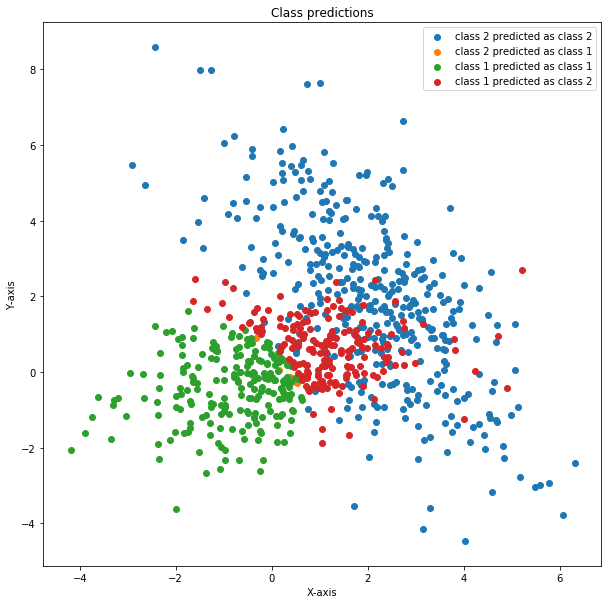

In [0]:
plt.figure(figsize=(10,10))
plt.scatter(n2_2.iloc[:,0],n2_2.iloc[:,1],label='class 2 predicted as class 2')
plt.scatter(n2_1.iloc[:,0],n2_1.iloc[:,1],label='class 2 predicted as class 1')
plt.scatter(n1_1.iloc[:,0],n1_1.iloc[:,1],label='class 1 predicted as class 1')
plt.scatter(n1_2.iloc[:,0],n1_2.iloc[:,1],label='class 1 predicted as class 2')


plt.title('Class predictions')
plt.legend()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

Text(0, 0.5, 'Y-axis')

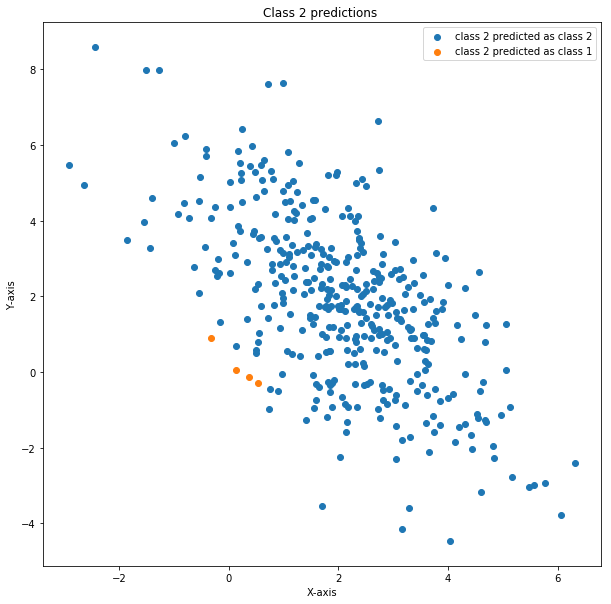

In [0]:
plt.figure(figsize=(10,10))
plt.scatter(n2_2.iloc[:,0],n2_2.iloc[:,1],label='class 2 predicted as class 2')
plt.scatter(n2_1.iloc[:,0],n2_1.iloc[:,1],label='class 2 predicted as class 1')
#plt.scatter(n1_1.iloc[:,0],n1_1.iloc[:,1],label='class 1 predicted as class 1')
#plt.scatter(n1_2.iloc[:,0],n1_2.iloc[:,1],label='class 1 predicted as class 2')


plt.title('Class 2 predictions ')
plt.legend()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

Text(0, 0.5, 'Y-axis')

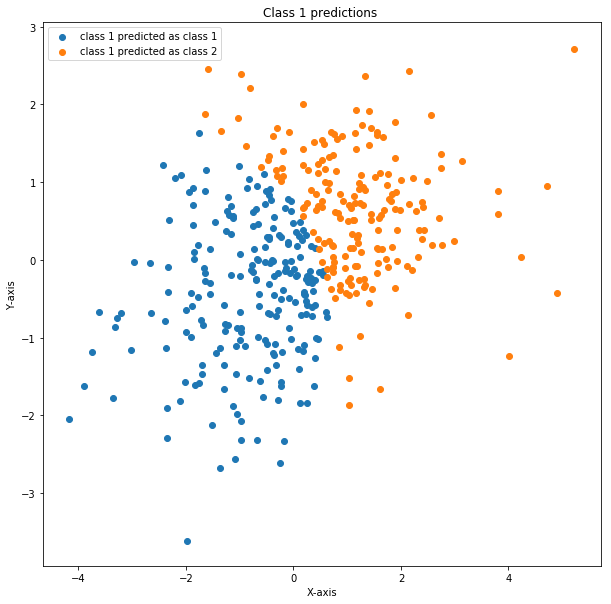

In [0]:
plt.figure(figsize=(10,10))
#plt.scatter(n2_2.iloc[:,0],n2_2.iloc[:,1],label='class 2 predicted as class 2')
#plt.scatter(n2_1.iloc[:,0],n2_1.iloc[:,1],label='class 2 predicted as class 1')
plt.scatter(n1_1.iloc[:,0],n1_1.iloc[:,1],label='class 1 predicted as class 1')
plt.scatter(n1_2.iloc[:,0],n1_2.iloc[:,1],label='class 1 predicted as class 2')


plt.title('Class 1 predictions ')
plt.legend()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

In [0]:
ch=(len(n1_2)+len(n2_1))/800
print('Probability of error is {}'.format(ch))

Probability of error is 0.2375


# Question 3.1

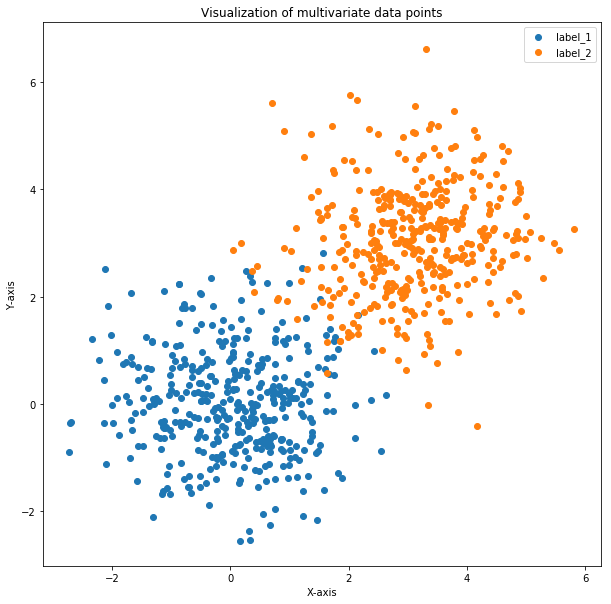

In [0]:
mean1=[0,0]
cov1=[[1,0],[0,1]]
mean2=[3,3]
cov2=[[1,0],[0,1]]
p_w1=0.5
p_w2=0.5
sigma=1
o1= np.random.multivariate_normal(mean1, cov1, 400) # creates the multivariate rv  with the given mean and cov

o2= np.random.multivariate_normal(mean2, cov2, 400)
viz_data_points(o1,o2)


In [0]:
w1=pd.DataFrame(data=o1,columns=['d1','d2'])
#w1['Real_Label']=np.ones(400)*1

 
w2=pd.DataFrame(data=o2,columns=['d1','d2'])
#)w2['Real_Label']=np.ones(400)*2


In [0]:
m1=np.mean(w1,axis=0).values.reshape(-1,1)
m2=np.mean(w2,axis=0).values.reshape(-1,1)


In [0]:
S1=np.cov(o1.T)

In [0]:
S2=np.cov(o2.T)

In [0]:

S_W =S1+S2#within class scatter matrix

In [0]:
S_W

array([[2.05450081, 0.07725756],
       [0.07725756, 2.05256742]])

In [0]:
S_B=(m1-m2)@(m1-m2).T

In [0]:
S_B

array([[9.40634444, 9.2599211 ],
       [9.2599211 , 9.11577704]])

In [0]:
eig_vals, eig_vecs = np.linalg.eig(inv(S_W).dot(S_B))

In [0]:
eig_vals

array([8.88178420e-16, 8.40040768e+00])

In [0]:
wq=eig_vecs[1,:]

In [0]:
o1.shape,wq.shape

((400, 2), (2,))

In [0]:
X1_lda = o1@wq
X2_lda = o2@wq

In [0]:
X1_lda.shape

(400, 1)

In [0]:
y=np.ones(400)

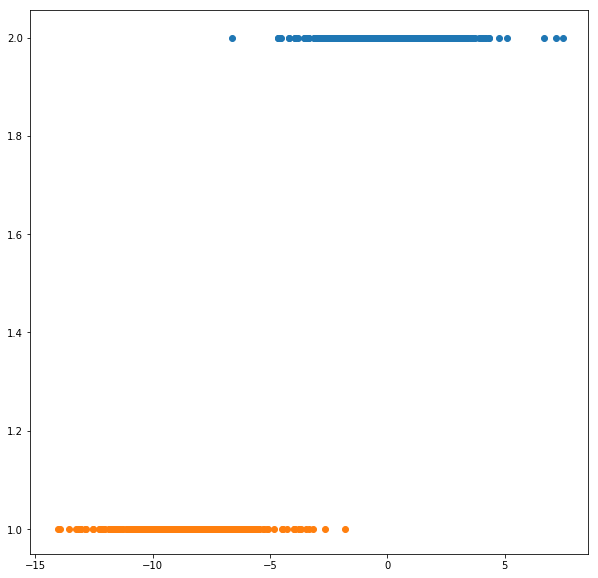

In [0]:
y=np.ones(400)
plt.figure(figsize=(10,10))
plt.scatter(X1_lda,y)
plt.scatter(X2_lda,y)

In [0]:
wq=inv(S_W)@(m1-m2)

In [0]:
wq

array([[-1.45397225],
       [-1.43489994]])